In [99]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, explained_variance_score
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

np.random.seed(0)

In [3]:
# load data
df = pd.read_csv('data/df_genial.csv')
df = df.fillna(0)
def get_types(df):
    df['year'] = df['year'].astype(int)
    df['Formede træer'] = df['Formede træer'].astype(int)
    df['Gade- og allétræer'] = df['Gade- og allétræer'].astype(int)
    df['Park- og naturtræer'] = df['Park- og naturtræer'].astype(int)
    df['Private træer'] = df['Private træer'].astype(int)
    df['Træer i bevoksninger'] = df['Træer i bevoksninger'].astype(int)
    return df 
df = get_types(df)
df['year'] = df['year'].astype(int) - 2000

In [113]:
# Model: trees per km2 ~ district + year + district:year
lm = smf.ols(formula='trees_km2 ~ C(district) + year + year:C(district)', data = df)
lm_fit = lm.fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              trees_km2   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     5.610
Date:                Tue, 03 May 2022   Prob (F-statistic):           7.47e-11
Time:                        21:50:47   Log-Likelihood:                -787.47
No. Observations:                 207   AIC:                             1615.
Df Residuals:                     187   BIC:                             1682.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                         2.7125      4.815      0.563      0.574      -6.785      12.210
C(district)[T.Amager Øst]                         2.3539      7.057      0.334      0.739     -11.569      16.276
C(district)[T.Bispebjerg]                         5.7614      6.809      0.846      0.399      -7.670      19.193
C(district)[T.Brønshøj-Husum]                    -1.2897      6.809     -0.189      0.850     -14.722      12.142
C(district)[T.Indre By]                           3.2729      6.809      0.481      0.631     -10.159      16.705
C(district)[T.Nørrebro]                           5.9377      6.809      0.872      0.384      -7.494      19.370
C(district)[T.Valby]                             -1.5592      6.809     -0.229      0.819     -14.991      11.873
C(district)[T.Vanløse]                            3.1719      7.272      0.436      0.663     -11.173      17.517
C(district)[T.Vesterbro-Kongens Enghave]         10.1080      6.809      1.485      0.139      -3.324      23.540
C(district)[T.Østerbro]                           0.0314      6.809      0.005      0.996     -13.400      13.463
year                                              0.3441      0.412      0.835      0.405      -0.468       1.157
year:C(district)[T.Amager Øst]                   -0.2730      0.596     -0.458      0.648      -1.449       0.903
year:C(district)[T.Bispebjerg]                   -0.0193      0.582     -0.033      0.974      -1.168       1.130
year:C(district)[T.Brønshøj-Husum]               -0.0978      0.582     -0.168      0.867      -1.247       1.051
year:C(district)[T.Indre By]                      0.0928      0.582      0.159      0.874      -1.056       1.242
year:C(district)[T.Nørrebro]                      1.2585      0.582      2.161      0.032       0.109       2.407
year:C(district)[T.Valby]                         0.4658      0.582      0.800      0.425      -0.683       1.615
year:C(district)[T.Vanløse]                      -0.2650      0.606     -0.437      0.663      -1.461       0.931
year:C(district)[T.Vesterbro-Kongens Enghave]    -0.3264      0.582     -0.560      0.576      -1.475       0.823
year:C(district)[T.Østerbro]                      1.4643      0.582      2.514      0.013       0.315       2.613
==============================================================================
Omnibus:                      108.176   Durbin-Watson:                   2.174
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              592.197
Skew:                           2.005   Prob(JB):                    2.55e-129
Kurtosis:                      10.252   Cond. No.                         248.
==================================================================

In [114]:
lm_anova = sm.stats.anova_lm(lm_fit, typ=2) # Type 2 partitioning of variance
print(lm_anova) # all variables are significant 

                        sum_sq     df          F        PR(>F)
C(district)        8674.141491    9.0   7.379924  3.445526e-09
year               2581.597762    1.0  19.767714  1.496980e-05
year:C(district)   2793.035295    9.0   2.376303  1.443157e-02
Residual          24421.578826  187.0        NaN           NaN


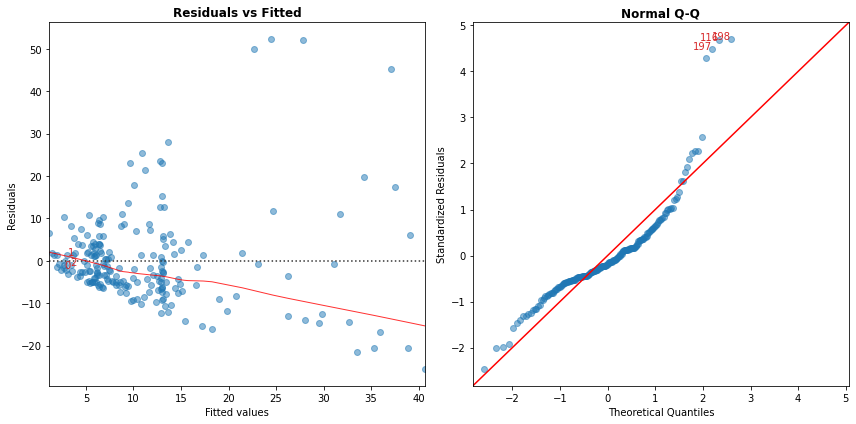

In [128]:
diag_lm = Linear_Reg_Diagnostic(lm_fit)
fig, axes = plt.subplots(1,2,figsize=(12,6))
diag_lm.residual_plot(ax=axes[0])
diag_lm.qq_plot(ax=axes[1])
plt.tight_layout()
plt.show()

0.1985693427988897
number of bins:  15


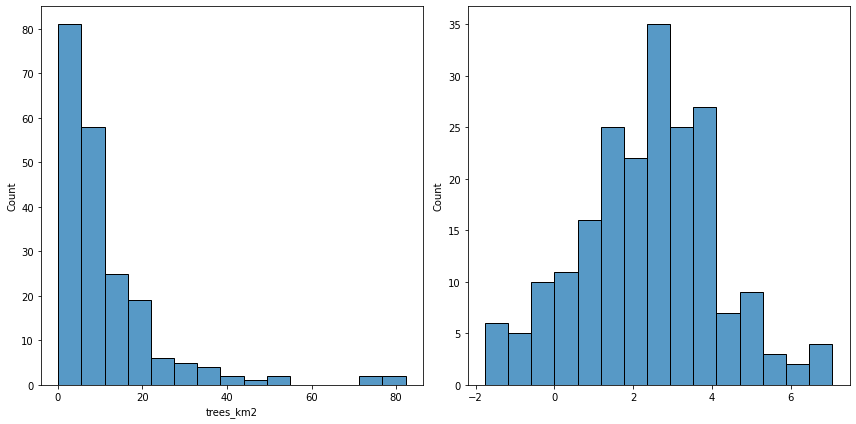

In [118]:
# Histogram of response variable - should be normal distributed for GLM
# Before and after boxcox transformation 
y_transform, lambda_fitted = stats.boxcox(df['trees_km2']) # boxcox transformation
print(lambda_fitted)
nbins = int(np.ceil(np.sqrt(df.shape[0])))
print('number of bins: ', nbins)

fig, axes = plt.subplots(1,2,figsize=(12,6))
sns.histplot(df['trees_km2'], bins = nbins, ax=axes[0])
sns.histplot(y_transform, bins = nbins, ax=axes[1])
plt.tight_layout()
plt.show()

In [119]:
# Model: trees km2 transformed ~ district + year + district:year
df['trees_km2_transform'] = y_transform
lm1 = smf.ols(formula='trees_km2_transform ~ C(district) + year + year:C(district)', data = df)
lm_fit1 = lm1.fit()
lm_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     trees_km2_transform   R-squared:                       0.375
Model:                             OLS   Adj. R-squared:                  0.312
Method:                  Least Squares   F-statistic:                     5.914
Date:                 Tue, 03 May 2022   Prob (F-statistic):           1.59e-11
Time:                         21:51:07   Log-Likelihood:                -362.06
No. Observations:                  207   AIC:                             764.1
Df Residuals:                      187   BIC:                             830.8
Df Model:                           19                                         
Covariance Type:             nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                         1.0937      0.617      1.774      0.078      -0.123       2.310
C(district)[T.Amager Øst]                         0.2717      0.904      0.301      0.764      -1.511       2.055
C(district)[T.Bispebjerg]                         0.5310      0.872      0.609      0.543      -1.189       2.251
C(district)[T.Brønshøj-Husum]                    -0.9959      0.872     -1.142      0.255      -2.716       0.724
C(district)[T.Indre By]                           0.7385      0.872      0.847      0.398      -0.982       2.459
C(district)[T.Nørrebro]                           1.6284      0.872      1.867      0.063      -0.092       3.349
C(district)[T.Valby]                             -0.4678      0.872     -0.536      0.592      -2.188       1.253
C(district)[T.Vanløse]                            0.1698      0.931      0.182      0.856      -1.667       2.007
C(district)[T.Vesterbro-Kongens Enghave]          1.5282      0.872      1.752      0.081      -0.192       3.249
C(district)[T.Østerbro]                           0.2757      0.872      0.316      0.752      -1.445       1.996
year                                              0.0644      0.053      1.221      0.223      -0.040       0.168
year:C(district)[T.Amager Øst]                   -0.0373      0.076     -0.488      0.626      -0.188       0.113
year:C(district)[T.Bispebjerg]                    0.0128      0.075      0.172      0.863      -0.134       0.160
year:C(district)[T.Brønshøj-Husum]                0.0053      0.075      0.071      0.943      -0.142       0.152
year:C(district)[T.Indre By]                      0.0162      0.075      0.217      0.828      -0.131       0.163
year:C(district)[T.Nørrebro]                      0.0689      0.075      0.924      0.357      -0.078       0.216
year:C(district)[T.Valby]                         0.0959      0.075      1.285      0.200      -0.051       0.243
year:C(district)[T.Vanløse]                      -0.0083      0.078     -0.107      0.915      -0.162       0.145
year:C(district)[T.Vesterbro-Kongens Enghave]    -0.0281      0.075     -0.377      0.707      -0.175       0.119
year:C(district)[T.Østerbro]                      0.1211      0.075      1.623      0.106      -0.026       0.268
==============================================================================
Omnibus:                        1.024   Durbin-Watson:                   2.223
Prob(Omnibus):                  0.599   Jarque-Bera (JB):                1.029
Skew:                          -0.041   Prob(JB):                        0.598
Kurtosis:                       2.664   Cond. No.                         248.
=======================================================

In [129]:
lm_anova = sm.stats.anova_lm(lm_fit1, typ=2) # Type 2 partitioning of variance
print(lm_anova) # the interaction is not significant 

                      sum_sq     df          F        PR(>F)
C(district)       162.962331    9.0   8.451841  1.457215e-10
year               61.089886    1.0  28.515169  2.677302e-07
year:C(district)   19.037146    9.0   0.987338  4.519428e-01
Residual          400.622173  187.0        NaN           NaN


In [130]:
# Removing interaction year:district
lm2 = smf.ols(formula='trees_km2_transform ~ C(district) + year', data = df)
lm_fit2 = lm2.fit()
lm_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     trees_km2_transform   R-squared:                       0.346
Model:                             OLS   Adj. R-squared:                  0.312
Method:                  Least Squares   F-statistic:                     10.35
Date:                 Tue, 03 May 2022   Prob (F-statistic):           5.83e-14
Time:                         21:54:31   Log-Likelihood:                -366.87
No. Observations:                  207   AIC:                             755.7
Df Residuals:                      196   BIC:                             792.4
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    0.8368      0.361      2.317      0.022       0.125       1.549
C(district)[T.Amager Øst]                   -0.1260      0.457     -0.276      0.783      -1.028       0.776
C(district)[T.Bispebjerg]                    0.6594      0.452      1.460      0.146      -0.231       1.550
C(district)[T.Brønshøj-Husum]               -0.9426      0.452     -2.087      0.038      -1.833      -0.052
C(district)[T.Indre By]                      0.9004      0.452      1.994      0.048       0.010       1.791
C(district)[T.Nørrebro]                      2.3178      0.452      5.133      0.000       1.427       3.208
C(district)[T.Valby]                         0.4910      0.452      1.087      0.278      -0.400       1.382
C(district)[T.Vanløse]                       0.0615      0.463      0.133      0.895      -0.852       0.976
C(district)[T.Vesterbro-Kongens Enghave]     1.2471      0.452      2.762      0.006       0.357       2.138
C(district)[T.Østerbro]                      1.4863      0.452      3.291      0.001       0.596       2.377
year                                         0.0901      0.017      5.342      0.000       0.057       0.123
==============================================================================
Omnibus:                        0.482   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.786   Jarque-Bera (JB):                0.614
Skew:                           0.022   Prob(JB):                        0.736
Kurtosis:                       2.737   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
lm_anova = sm.stats.anova_lm(lm_fit2, typ=2) # Type 2 partitioning of variance
print(lm_anova) # all variables are significant 

                 sum_sq     df          F        PR(>F)
C(district)  162.962331    9.0   8.456758  1.196177e-10
year          61.089886    1.0  28.531757  2.541870e-07
Residual     419.659319  196.0        NaN           NaN


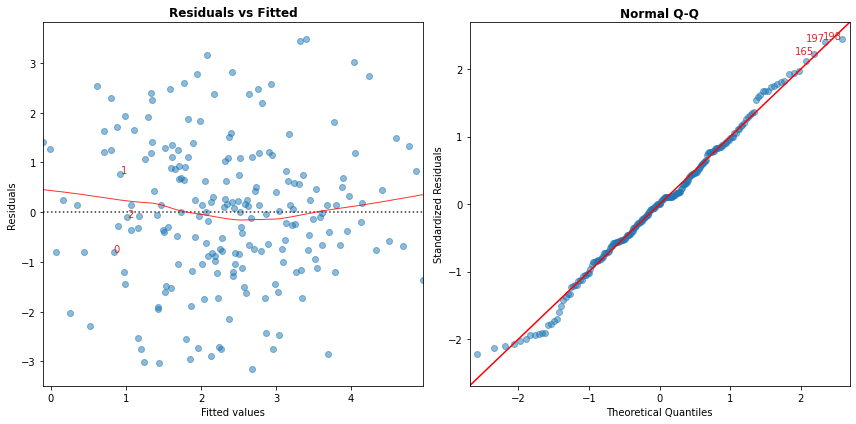

In [132]:
diag_lm2 = Linear_Reg_Diagnostic(lm_fit2)
fig, axes = plt.subplots(1,2, figsize=(12,6))
diag_lm2.residual_plot(ax=axes[0])
diag_lm2.qq_plot(ax=axes[1])
plt.tight_layout()
plt.show()

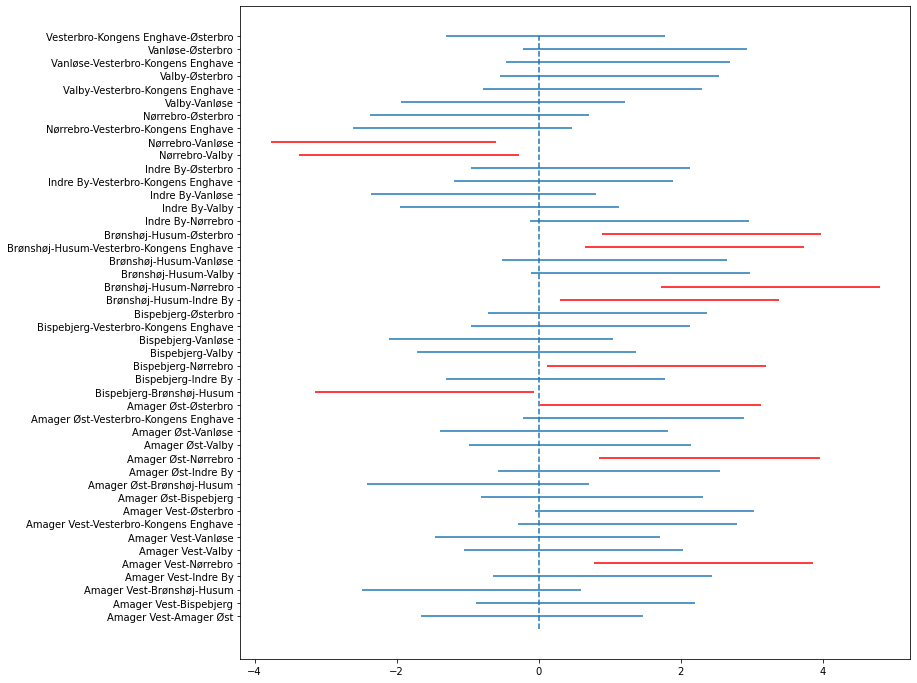

In [124]:
# Turkey's pairwise test to compare means 
tukey = pairwise_tukeyhsd(endog=df['trees_km2_transform'], groups=df['district'], alpha=0.05)

def plot_tukey(tukey):
    plt.figure(figsize=(12,12))
    rows = tukey.summary().data[1:]
    lower = [row[4] for row in rows]
    upper = [row[5] for row in rows]
    i = 0
    for (l,u) in zip(lower,upper):
        if (l * u) < 0:
            plt.hlines(i,l, u)
        else: 
            plt.hlines(i,l, u, colors='red')
        i = i+1
    plt.vlines( 0, -1, len( rows )-1, linestyles='dashed' )
    plt.gca().set_yticks( range( len( rows ) ) )
    plt.gca().set_yticklabels( [ f'{x[0]}-{x[1]}' for x in rows ] )
    plt.show()

plot_tukey(tukey)

In [126]:
# Compare models by AIC
y = df['trees_km2']
dy_transform = 1/(y*(1-y**(lambda_fitted)))
log_dy_transform = np.sum(np.log(np.abs(dy_transform)))
loglik = -366.87 + log_dy_transform
AIC = -2*loglik + 2*len(lm_fit2.params)
AIC

1095.0661729323228

In [ ]:
df.rename(columns={'Gennemsnit for alle personer med indkomsten (kr.)':'avg_income'}, inplace=True)
#scaler = MinMaxScaler()
#df['avg_income'] = scaler.fit_transform(df['avg_income'].values.reshape(-1,1))

In [103]:
# base code
import numpy as np
import seaborn as sns
import statsmodels
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from typing import Type

In [104]:
# base code
style_talk = 'seaborn-talk'    #refer to plt.style.available

class Linear_Reg_Diagnostic():
    """
    Diagnostic plots to identify potential problems in a linear regression fit.
    Mainly,
        a. non-linearity of data
        b. Correlation of error terms
        c. non-constant variance
        d. outliers
        e. high-leverage points
        f. collinearity

    Author:
        Prajwal Kafle (p33ajkafle@gmail.com, where 3 = r)
        Does not come with any sort of warranty.
        Please test the code one your end before using.
    """

    def __init__(self,
                 results: Type[statsmodels.regression.linear_model.RegressionResultsWrapper]) -> None:
        """
        For a linear regression model, generates following diagnostic plots:

        a. residual
        b. qq
        c. scale location and
        d. leverage

        and a table

        e. vif

        Args:
            results (Type[statsmodels.regression.linear_model.RegressionResultsWrapper]):
                must be instance of statsmodels.regression.linear_model object

        Raises:
            TypeError: if instance does not belong to above object

        Example:
        >>> import numpy as np
        >>> import pandas as pd
        >>> import statsmodels.formula.api as smf
        >>> x = np.linspace(-np.pi, np.pi, 100)
        >>> y = 3*x + 8 + np.random.normal(0,1, 100)
        >>> df = pd.DataFrame({'x':x, 'y':y})
        >>> res = smf.ols(formula= "y ~ x", data=df).fit()
        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls(plot_context="seaborn-paper")

        In case you do not need all plots you can also independently make an individual plot/table
        in following ways

        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls.residual_plot()
        >>> cls.qq_plot()
        >>> cls.scale_location_plot()
        >>> cls.leverage_plot()
        >>> cls.vif_table()
        """

        if isinstance(results, statsmodels.regression.linear_model.RegressionResultsWrapper) is False:
            raise TypeError("result must be instance of statsmodels.regression.linear_model.RegressionResultsWrapper object")

        self.results = maybe_unwrap_results(results)

        self.y_true = self.results.model.endog
        self.y_predict = self.results.fittedvalues
        self.xvar = self.results.model.exog
        self.xvar_names = self.results.model.exog_names

        self.residual = np.array(self.results.resid)
        influence = self.results.get_influence()
        self.residual_norm = influence.resid_studentized_internal
        self.leverage = influence.hat_matrix_diag
        self.cooks_distance = influence.cooks_distance[0]
        self.nparams = len(self.results.params)

    def __call__(self, plot_context='seaborn-paper'):
        # print(plt.style.available)
        with plt.style.context(plot_context):
            fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
            self.residual_plot(ax=ax[0,0])
            self.qq_plot(ax=ax[0,1])
            self.scale_location_plot(ax=ax[1,0])
            self.leverage_plot(ax=ax[1,1])
            plt.show()

        self.vif_table()
        return fig, ax


    def residual_plot(self, ax=None):
        """
        Residual vs Fitted Plot

        Graphical tool to identify non-linearity.
        (Roughly) Horizontal red line is an indicator that the residual has a linear pattern
        """
        if ax is None:
            fig, ax = plt.subplots()

        sns.residplot(
            x=self.y_predict,
            y=self.residual,
            lowess=True,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        residual_abs = np.abs(self.residual)
        abs_resid = np.flip(np.sort(residual_abs))
        abs_resid_top_3 = abs_resid[:3]
        for i, _ in enumerate(abs_resid_top_3):
            ax.annotate(
                i,
                xy=(self.y_predict[i], self.residual[i]),
                color='C3')

        ax.set_title('Residuals vs Fitted', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel('Residuals')
        return ax

    def qq_plot(self, ax=None):
        """
        Standarized Residual vs Theoretical Quantile plot

        Used to visually check if residuals are normally distributed.
        Points spread along the diagonal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        QQ = ProbPlot(self.residual_norm)
        QQ.qqplot(line='45', alpha=0.5, lw=1, ax=ax)

        # annotations
        abs_norm_resid = np.flip(np.argsort(np.abs(self.residual_norm)), 0)
        abs_norm_resid_top_3 = abs_norm_resid[:3]
        for r, i in enumerate(abs_norm_resid_top_3):
            ax.annotate(
                i,
                xy=(np.flip(QQ.theoretical_quantiles, 0)[r], self.residual_norm[i]),
                ha='right', color='C3')

        ax.set_title('Normal Q-Q', fontweight="bold")
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Standardized Residuals')
        return ax

    def scale_location_plot(self, ax=None):
        """
        Sqrt(Standarized Residual) vs Fitted values plot

        Used to check homoscedasticity of the residuals.
        Horizontal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        residual_norm_abs_sqrt = np.sqrt(np.abs(self.residual_norm))

        ax.scatter(self.y_predict, residual_norm_abs_sqrt, alpha=0.5);
        sns.regplot(
            x=self.y_predict,
            y=residual_norm_abs_sqrt,
            scatter=False, ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        abs_sq_norm_resid = np.flip(np.argsort(residual_norm_abs_sqrt), 0)
        abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
        for i in abs_sq_norm_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], residual_norm_abs_sqrt[i]),
                color='C3')
        ax.set_title('Scale-Location', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel(r'$\sqrt{|\mathrm{Standardized\ Residuals}|}$');
        return ax

    def leverage_plot(self, ax=None):
        """
        Residual vs Leverage plot

        Points falling outside Cook's distance curves are considered observation that can sway the fit
        aka are influential.
        Good to have none outside the curves.
        """
        if ax is None:
            fig, ax = plt.subplots()

        ax.scatter(
            self.leverage,
            self.residual_norm,
            alpha=0.5);

        sns.regplot(
            x=self.leverage,
            y=self.residual_norm,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        leverage_top_3 = np.flip(np.argsort(self.cooks_distance), 0)[:3]
        for i in leverage_top_3:
            ax.annotate(
                i,
                xy=(self.leverage[i], self.residual_norm[i]),
                color = 'C3')

        xtemp, ytemp = self.__cooks_dist_line(0.5) # 0.5 line
        ax.plot(xtemp, ytemp, label="Cook's distance", lw=1, ls='--', color='red')
        xtemp, ytemp = self.__cooks_dist_line(1) # 1 line
        ax.plot(xtemp, ytemp, lw=1, ls='--', color='red')

        ax.set_xlim(0, max(self.leverage)+0.01)
        ax.set_title('Residuals vs Leverage', fontweight="bold")
        ax.set_xlabel('Leverage')
        ax.set_ylabel('Standardized Residuals')
        ax.legend(loc='upper right')
        return ax

    def vif_table(self):
        """
        VIF table

        VIF, the variance inflation factor, is a measure of multicollinearity.
        VIF > 5 for a variable indicates that it is highly collinear with the
        other input variables.
        """
        vif_df = pd.DataFrame()
        vif_df["Features"] = self.xvar_names
        vif_df["VIF Factor"] = [variance_inflation_factor(self.xvar, i) for i in range(self.xvar.shape[1])]

        print(vif_df
                .sort_values("VIF Factor")
                .round(2))


    def __cooks_dist_line(self, factor):
        """
        Helper function for plotting Cook's distance curves
        """
        p = self.nparams
        formula = lambda x: np.sqrt((factor * p * (1 - x)) / x)
        x = np.linspace(0.001, max(self.leverage), 50)
        y = formula(x)
        return x, y